# Bagging or Bootstrap Aggregating

- Bootstrap sampling: Sampling with Replacements
- Combine by averaging the output (regression)
- Combine by voting (classification)
- Can be applied to many classifiers which includes ANN, CART, etc.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.shape

(891, 15)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df['pclass'].unique()

array([3, 1, 2])

In [6]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [7]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

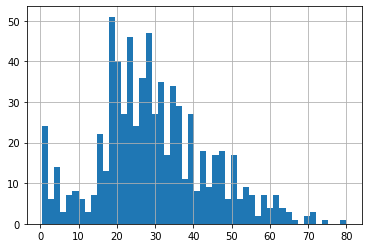

In [8]:
df['age'].hist(bins=50)

# Data Pre-processing

In [9]:
subset = df[['pclass', 'sex', 'age', 'survived']].copy()
subset.dropna(inplace=True)

In [10]:
X = subset[['pclass', 'sex', 'age']].copy()

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [12]:
X['sex'] = le.fit_transform(subset['sex'])
X.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [13]:
X.describe()

,pclass,sex,age
count,714.000000,714.000000,714.000000
mean,2.236695,0.634454,29.699118
std,0.838250,0.481921,14.526497
min,1.000000,0.000000,0.420000
25%,1.000000,0.000000,20.125000
50%,2.000000,1.000000,28.000000
75%,3.000000,1.000000,38.000000
max,3.000000,1.000000,80.000000


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  714 non-null    int64  
 1   sex     714 non-null    int64  
 2   age     714 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 22.3 KB


In [15]:
y = subset['survived'].copy()

In [16]:
y.value_counts()

0    424
1    290
Name: survived, dtype: int64

# Fit Model

In [17]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        res = clf.predict(X_train)
        print("Train results : \n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train,
                                                               res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train,
                                                                           res)))
        print("Confusion Matrix: \n{}\n".format(confusion_matrix(y_train,
                                                                res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train),
                                                       lb.transform(res))))
        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy : \t{0:.4f}".format(np.mean(res)))
        print("Average SD : \t\t{0:.4f}".format(np.std(res)))
    elif train==False:
        res_test = clf.predict(X_test)
        print("Test results : \n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test,
                                                               res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test,
                                                                           res_test)))
        print("Confusion Matrix: \n{}\n".format(confusion_matrix(y_test,
                                                                res_test)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test),
                                                       lb.transform(res_test))))

# RandomForestClassifier

In [21]:
clf = RandomForestClassifier(random_state=42, n_estimators=50)

In [22]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [23]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print("\t\t #####################################")
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train results : 

Accuracy Score: 0.8998

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       299
           1       0.90      0.84      0.87       200

    accuracy                           0.90       499
   macro avg       0.90      0.89      0.89       499
weighted avg       0.90      0.90      0.90       499


Confusion Matrix: 
[[280  19]
 [ 31 169]]

ROC AUC: 0.8907

Average Accuracy : 	0.7656
Average SD : 		0.0426
		 #####################################
Test results : 

Accuracy Score: 0.8326

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       125
           1       0.81      0.78      0.80        90

    accuracy                           0.83       215
   macro avg       0.83      0.82      0.83       215
weighted avg       0.83      0.83      0.83       215


Confusion Matrix: 
[[109  16]
 [ 20  70]]

ROC AUC: 0.8249



# Bagging (without oob_score)

- use (with oobe) out-of-bag samples to estimate the generalization accuracy

In [24]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                           bootstrap=True,
                           n_jobs=-1, random_state=42)

In [25]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [26]:
# bag_clf.oob_score_

In [27]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
print("\n\t\t #####################################\n")
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)

Train results : 

Accuracy Score: 0.8717

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       299
           1       0.87      0.80      0.83       200

    accuracy                           0.87       499
   macro avg       0.87      0.86      0.86       499
weighted avg       0.87      0.87      0.87       499


Confusion Matrix: 
[[276  23]
 [ 41 159]]

ROC AUC: 0.8590

Average Accuracy : 	0.7876
Average SD : 		0.0301

		 #####################################

Test results : 

Accuracy Score: 0.8279

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       125
           1       0.82      0.76      0.79        90

    accuracy                           0.83       215
   macro avg       0.83      0.82      0.82       215
weighted avg       0.83      0.83      0.83       215


Confusion Matrix: 
[[110  15]
 [ 22  68]]

ROC AUC: 0.8178


# Bagging (oobe_score = True)

In [28]:
bag_clf1 = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                           bootstrap=True, oob_score=True,
                           n_jobs=-1, random_state=42)

In [29]:
bag_clf1.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [30]:
print_score(bag_clf1, X_train, X_test, y_train, y_test, train=True)
print("\n\t\t #####################################\n")
print_score(bag_clf1, X_train, X_test, y_train, y_test, train=False)

Train results : 

Accuracy Score: 0.8717

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       299
           1       0.87      0.80      0.83       200

    accuracy                           0.87       499
   macro avg       0.87      0.86      0.86       499
weighted avg       0.87      0.87      0.87       499


Confusion Matrix: 
[[276  23]
 [ 41 159]]

ROC AUC: 0.8590

Average Accuracy : 	0.7876
Average SD : 		0.0301

		 #####################################

Test results : 

Accuracy Score: 0.8279

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       125
           1       0.82      0.76      0.79        90

    accuracy                           0.83       215
   macro avg       0.83      0.82      0.82       215
weighted avg       0.83      0.83      0.83       215


Confusion Matrix: 
[[110  15]
 [ 22  68]]

ROC AUC: 0.8178


In [ ]:
bag_clf1.oob_score_

# GRID Search

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV

In [41]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

In [42]:
params_grid = {"max_depth": [3, None],
              "min_samples_split": [2,3,10],
              "min_samples_leaf": [1,3,10],
              "bootstrap": [True, False],
              "criterion": ['gini', 'entropy']}

In [43]:
grid_search = GridSearchCV(rf_clf, params_grid, 
                          n_jobs=-1, cv=5,
                          verbose=1, scoring='accuracy',
                          iid=False)

In [44]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   50.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [45]:
grid_search.best_score_

0.8035757575757575

In [46]:
grid_search.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [47]:
print_score(grid_search, X_train, X_test, y_train, y_test, train=True)
print("\n\t\t #####################################\n")
print_score(grid_search, X_train, X_test, y_train, y_test, train=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Train results : 

Accuracy Score: 0.8156

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       299
           1       0.92      0.59      0.72       200

    accuracy                           0.82       499
   macro avg       0.85      0.78      0.79       499
weighted avg       0.83      0.82      0.81       499


Confusion Matrix: 
[[288  11]
 [ 81 119]]

ROC AUC: 0.7791

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   48.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   48.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   48.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   48.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   47.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   47.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   47.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   47.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   47.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.8s


Average Accuracy : 	0.7935
Average SD : 		0.0316

		 #####################################

Test results : 

Accuracy Score: 0.8279

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.96      0.87       125
           1       0.92      0.64      0.76        90

    accuracy                           0.83       215
   macro avg       0.86      0.80      0.81       215
weighted avg       0.84      0.83      0.82       215


Confusion Matrix: 
[[120   5]
 [ 32  58]]

ROC AUC: 0.8022



[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   48.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


# Extra-Trees (Extremely randomised Trees) Ensemble

- Random Forest is build upon Decision Trees
- Decision Tree node splitting is based on the gini or entropy or some other algorithms
- Extra-Trees make use of random threshold for each feature unlike Decision Tree.

In [54]:
from sklearn.ensemble import ExtraTreesClassifier

In [55]:
st_clf = ExtraTreesClassifier(random_state=42, n_estimators=100)

In [56]:
st_clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [57]:
print_score(st_clf, X_train, X_test, y_train, y_test, train=True)
print("\n\t\t #####################################\n")
print_score(st_clf, X_train, X_test, y_train, y_test, train=False)

Train results : 

Accuracy Score: 0.8998

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       299
           1       0.93      0.81      0.87       200

    accuracy                           0.90       499
   macro avg       0.91      0.89      0.89       499
weighted avg       0.90      0.90      0.90       499


Confusion Matrix: 
[[286  13]
 [ 37 163]]

ROC AUC: 0.8858

Average Accuracy : 	0.7635
Average SD : 		0.0437

		 #####################################

Test results : 

Accuracy Score: 0.8372

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       125
           1       0.82      0.78      0.80        90

    accuracy                           0.84       215
   macro avg       0.83      0.83      0.83       215
weighted avg       0.84      0.84      0.84       215


Confusion Matrix: 
[[110  15]
 [ 20  70]]

ROC AUC: 0.8289
